---
layout: default
title: "Deep Learning - Bias & Variance"
categories: deeplearning
permalink: /ML25/
order: 25
comments: true
---

In [2]:
%pylab --no-import-all inline
import pandas as pd
from plot_ann import ann
from mpl_flow import Flow
from itertools import chain

Populating the interactive namespace from numpy and matplotlib


/home/marnec/.local/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Bias and Variance
Bias and Variance in ML (<a href="ML8#fig:biasvariance">check this figure</a>)  are fundamental concepts and expert practitioners usually have a deep understanding of bias/variance related topics. 

In the deep learning era there is less discussion about the bias/variance trade-off because in the deep learning era there is less trade-off. So the concepts of bias and variance are still central but their trade-off is no more so important.

The reason for this is that in the pred-deep learning era usually you could reduce bias at the cost of increasing variance or vice-versa, but generally it wasn't possible to just reduce bias or just reduce variance. Instead, in deep learning, as long as you get a bigger network (in terms of layers or hidden units) you will generally reduce bias without impacting variance (if regularized properly), and as long as you can get more data you will generally reduce variance without impacting bias.

## Identify bias/variance from subset error
When only two features are present we can just look at the model (<a href="ML8#fig:biasvariance">check this figure</a>) and identify situations of high bias (panel A) or high variance (panel C).

When many features are present we can no longer visualize the model but we can employ some metrics that will help us identify these problems.

Suppose you have a classifier that should identify cat pictures. So $y=1$ for a picture of a cat and $y=0$ for any other pictures.

Suppose you fit your model on the training set and then measure the error on both the training set and development set and obtain the error as in <a href="#biasvarerror">the table below</a>.

In [3]:
caption = 'Four cases of error (as percentage of miscalssifications) calculated on the train- and test-sets after fitting a model'
pd.DataFrame([["1%","15%","15%","0.5%"],["11%","16%","30%","1%"]], 
             columns=[f'case {i}' for i in range(1, 5)], 
             index=['train set', 'dev set']).style.set_caption(caption).set_table_attributes('id="biasvarerror"')

,case 1,case 2,case 3,case 4
train set,1%,15%,15%,0.5%
dev set,11%,16%,30%,1%


Assuming that a person would have an error $\approx 0%$ and that the train and dev sets are drawn from the same distribution:

* case 1 is a case of high variance
* case 2 is a case of high bias
* case 3 is a case of high bias AND high variance (the worst scenario)
* case 4 is a case of low bias and low variance (the best scenario)

It is important to notice that we detected bias and variance based on the assumption that the **optimal error**, also called **Bayes error** (<a href="page:ML33">ML33</a>) is $\approx 0%$. Would the Bayes error $\approx 15%$, then we can say that case 2 is a case of low bias and low variance. 

The difference between Bayes error and training set error is sometimes called **Avoidable Bias** and the objective is usually that of reducing the gap between train error and Bayes error. in the same way as we define the avoidable bias, we can also define variance, which is the gap between the training set error and the dev set error. 

##  Human level performance
Deep-learning applications are often compared with human-level performance. First, because ML is become so advanced that can perform as well or better than human-level performance. Second, because it turns out that the model workflow is much more efficient when the algorithm is trying to do something that also humans can do. In those settings, it becomes natural to compare with human-level performance

Typically, when designing a ML model, performance will rapidly increase at first, approach and surpass human level performance and then asymptotically approach an ideal performance, called **Bayes optimal error**, which is the best theoretical function mapping $x \to y$, that can never be surpassed.

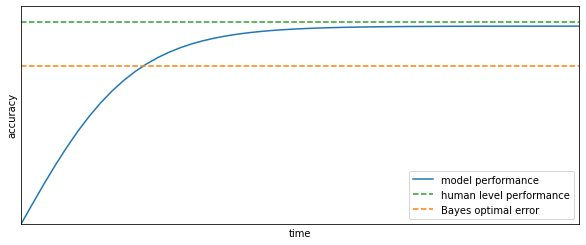

In [4]:
fig, ax = plt.subplots(figsize=(10, 4))

x = np.linspace(0, 10)
y = 1/(1+np.e**-x)

ax.plot(x, y, label='model performance')
ax.axhline(1.01, ls='--', c='C2', label='human level performance')
ax.axhline(0.9, ls='--', c='C1', label='Bayes optimal error')
ax.legend()
ax.set_xticks([])
ax.set_xlabel('time')
ax.set_yticks([])
ax.set_xlim(0, 10)
ax.set_ylim(0.5, 1.05)
ax.set_ylabel('accuracy');

<i id="fig:pertrend">Typical trend of performance of a trained model with human level performance and Bayes optimal performance.</i>

Interestingly, usually performance increase, really slows down after surpassing human-level performance. This happens for (at least) two reasons:

* Human level performance is, for many tasks, very close to Bayes optimal error
* So long as ML is worse than humans there are certain things that we can do to improve performance:
    * get labeled data from humans
    * gain insight from manual error analysis (why did a person get this right?)
    * better analysis of bias/variance (<a href="page:ML25">ML25</a>)

### Define human level performance
The first step towards understanding the human level error for a certain task is to decide what purpose would serve its definition.

Suppose you are developing a model for the classification of radiology scans, and you find the following typical errors:

1. common person: 3% error
2. common doctor: 1% error
3. experienced radiologist: 0.7% error
4. team of experienced radiologists: 0.5%

If, as often is the case, you are using human level error as a proxy for Bayes error, you would chose option 4 as your human level performance. If you are developing a model for research purposes and you want to demonstrate that the model is usable in real world environment, you would probably chose option 2 as human level performance.

### Manual Error analysis
Suppose you are training a cat classifier, which has 90% accuracy and 10% errors. You notice that some dogs are incorrectly classified as cats. Should you try yo make your cat classifier perform better on dogs?

In order to answer this question it is often advisable to manually look at the data in order to advance an estimate of the maximum gain in performance that you might have by doing specific action; this is called **error analysis**.

In this case, you would extract around 100 mislabeled examples from the dev set and count how many of them are dogs. If 5% of them are dogs, you know that the maximum gain in performance will be to lower you error rate from 10% to 9.5%. However, if you notice that 50% of mislabeled examples are dogs, then you may be able to reduce your error from 10% to 5%.

In this example, we analyzed a single problem (dogs misclassified as cats) but, while you sort through your dev set misclassified examples, you can evaluate multiple options in parallel. For example, you may notice that some misclassified examples are great cats and some others are blurry images.

| Image |   Dog  | Great Cats | Blurry |
|----------------|-----|-----|-|
| 1 | x  |     |   | 
| 2 |  |    | x |
| 3 |  |   x  | x  |
| $\vdots$ | | |  |
| % of total | 8% |   43%  | 61%  |


#### Special case of incorrectly labeled examples
Deep learning algorithms are quite robust to random (or near-random) errors in the training set, they are less robust to systematic errors in the training set. When it comes to incorrectly labeled examples in the dev set, it is often a good idea have a separate count for incorrectly labeled examples during the manual error analysis.

The decision on whether or not to go through your entire dev set and correct the incorrectly labeled examples is bound to the same evaluation as for the other type of misclassifications found in manual error analysis. Since the goal of the dev set is to help you select between different models, if you don't trust anymore the performance evaluated on your dev set, then by all means you should correct misclassifications.

| Image |   Dog  | Great Cats | Blurry |Incorrectly<br> labeled |
|----------------|-----|-----|-|-|
| 1 | |     |   | | 
| 2 |  |    | | x |
| 3 |  |   x  |  | |
| $\vdots$ | | |  | x |
| % of total | 8% |   43%  | 61%  | 6% |

A couple of important caveats are:

* Apply the same process to your dev and test sets to make sure that they continue to come from the same distribution
* Consider examining examples your algorithm gt right as well as ones it got wrong. 
* you don't need to apply mislabeled correction to the train set if you apply it to your dev/test set. Train and dev/test data may now come slightly different distributions.

## Mismatched train and dev/test set
In the deep learning era, the need for data is such that sometimes you will use whatever data you have, regardless if it comes from the same distribution of the test/dev set. Training on a different distribution than dev/test set is possible but requires some considerations.

Suppose we are training a model that needs to classify pictures uploaded by users. These pictures are few in number and typically, they're blurry and shot by unprofessional photographers. On the other hand you have access from the web to a lot of professionally shot, high resolution pictures.

Your final objective is your ML performing well on user-fed pictures and you find yourself in front of a dilemma:

* you have a small dataset with a certain distribution that upon which your model needs to perform well
* you have a large dataset with a different distribution upon which you could train your model

### Option 1: Merge the datasets
One option would be to merge the two datasets, randomly reshuffle them and then split in training dev and test sets.

* Advantage: This approach has the advantage that the train and dev/test set will all come from the same distribution. 
* Disadvantage: The huge disadvantage is that a big portion of the dev set will be composed of the high-quality pictures. This means that model selection (operated on the results of the model on the dev set) will bring to optimize for a different distribution of data from what we care about.

### Option 2: Test on the target dataset
Split your target dataset (user-fed pictures) in two batches in an appropriate portion. One portion will go in the training set, the other portion will go in the dev/test set. All of the high-resolution pictures go in the training set.

* Advantage: You test your model on your target distribution, optimizing exactly on the distribution we care about
* Disadvantage: The training distribution is different from your dev/test distribution, however over the long term this split of data across the subsets usually give better performance.


## Bias and Variance with mismatched data
Suppose we are in the situation in which our training set come from a different distribution than our dev/test set. Let's assume that human level error $\approx 0%$

|                |     |
|----------------|-----|
| Training error | 1%  |
| Dev error      | 10% |

In a setting where train and dev set come from the same distribution, this is a case of high variance. But when train and dev set come from different distributions this is no more obvious. The 9% increase in error might be due to variance, but it could also be due to the different distributions of the train and dev set. In order to decouple this two problems we define an additional dataset, called **training-dev** set, that has the same distribution as the training set, but is not used for training. 

Before training we define 4 datasets: 

* Training set
* Training-dev set (same distribution as the training set but excluded from training)
* Dev set (different distribution than training set)
* Test set (if needed)

Suppose we find:

|                |   Case 1  |   Case 2  |   Case 3  | Case 4  | Case 5 |
|----------------|-----|-----|-|-|-|
| Training error | 1%  |   1%  | 10%  | 10% | 5%  |
| Training-dev error | 9%  |   1.5%  | 11% | 11% | 7%  |
| Dev error      | 10% |   10%  | 12%  |   20% | 4%  |

Let's take Case 1. We observe that the error increases of 8% from training data to training-dev data. Since there is no difference in distribution between the two datasets, and the only difference is that the model hasn't been trained on the training-dev data, we conclude that the model suffer from high variance.

Let's take Case 2. We observe that the error increases of 0.5% from training data to training-dev data. We conclude that we have low variance and the remaining difference in performance needs to be a **data-mismatch problem**.

Let's take Case 3. Remember that human level error (proxy for Bayes error) $\approx 0%$. We observe almost no difference in error between datasets, but a great difference between Bayes error and training error. This is an **Avoidable Bias problem**.

Let's take Case 4. We observe that a great difference between Bayes error and training error **and** a great difference between training-dev error and dev error. We deduce that this model has two issues: An avoidable bias problem and a data-mismatch problem.

Let's take Case 5. We observe that the dev error is smaller than the training error. We deduce that the training data was much more complex than dev data

A more general formulation

|                |   Training distribution  |  Dev distribution  |  
|----------------|-----|-----|
| Human level |  general human level |   ? (specific human level)  |
| Error on examples NN has trained on | training error  |   ? (error on dev distribution data split in train data) |
| Error on examples NN hasn't trained on | training-dev error |   dev/test error  |

We never cited the two columns marked by the question mark, but having data on those two situations can give us interesting information on the next steps to take.

## Addressing data mismatch
There are not completely systematic strategies to address data-mismatch problems but we can look at some things we can try.

The first thing we can do is to carry out manual error analysis on the dev set to understand how it is different from the training set (e.g. blurry images, noisy sound)

When we have gained insight on how train and dev set differ, we can try to make training data more similar to dev data; in alternative we can collect more training data from the same (or similar) distribution as the dev set. 

We can generate data with the same distribution as training data with **artificial data synthesis**: combine clean training data with noise resembling the kind of noise that you might encounter in the dev set. There is one big caveat with artificial data synthesis. If we have 100% hours of clean training data and 0.1% of noise data and we apply the noise to all training data by repeating the noise over and over, there is a chance that the model will **overfit the noise**, not generalizing all possible noise that of that category (e.g. blur).

## Basic recipe for correct training
This is a basic recipe to apply when training a model:

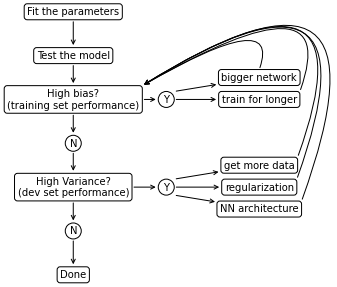

In [6]:
f = Flow(direction='ns', figsize=(4, 5))
f.node('Fit the parameters')
f.node('Test the model')
f.node('a', label='High bias?\n(training set performance)')
f.node('Y', bbox=dict(boxstyle='circle'), travel='e', distance=.5)
f.node('c', 'bigger network', travel='ne', distance=.5)
f.edge('c', 'a', tailport='n', arrowprops=dict(connectionstyle="angle3,angleA=30,angleB=-110"))
f.node('d', label='train for longer', startpoint='Y', travel='e', distance=.5)
f.edge('d', 'a', tailport='ne', headport='ne', arrowprops=dict(connectionstyle="angle3,angleA=30,angleB=-110"))
f.node('N', bbox=dict(boxstyle='circle'), startpoint='a')
f.node('b', label='High Variance?\n(dev set performance)')
f.node('Y', bbox=dict(boxstyle='circle'), travel='e', distance=.5)
f.node('e', label='get more data', travel='ne', distance=.5)
f.edge('e', 'a', tailport='ne', headport='ne', arrowprops=dict(connectionstyle="angle3,angleA=32,angleB=-110"))
f.node('f', label='regularization', travel='e', distance=.5, startpoint='Y')
f.edge('f', 'a', tailport='ne', headport='ne', arrowprops=dict(connectionstyle="angle3,angleA=32,angleB=-110"))
f.node('g', label='NN architecture', travel='se', distance=.5, startpoint='Y')
f.edge('g', 'a', tailport='ne', headport='ne', arrowprops=dict(connectionstyle="angle3,angleA=32,angleB=-110"))
f.node('N', bbox=dict(boxstyle='circle'), startpoint='b')
f.node('Done');

## Training is an iterative process
Training an optimal process at the first try is almost impossible even with a lot of experience in a specific field. As hinted by the previous paragraph, iterating over different options is fundamental. It becomes very important not to overthink a model, especially on the first iterations. A rule of thumb for moving quickly towards good results is **build the first system quickly, then iterate**:

* Set up dev/test set and metric
* Build the first system quickly
* Use Bias/Variance analysis and Error analysis to prioritize the next steps and iterate



## Orthogonalization
In training a ML algorithm, it is important to know what to tune in order to achieve a certain effect. A status in which each hyper-parameters tune exactly one aspect of the model is a status of perfect **orthogonalization** and is a status that we would like to achieve.

In machine learning, the effects that you want to orthogonalize are:

1. Fit training set well on cost function (for some applications this means approaching human-level performance): e.g. tune by getting a bigger network
2. Fit dev set well on cost function: e.g. tune by getting a bigger training set
3. Fit test set well on cost function: e.g. tune by getting a bigger dev set
4. Performs well in real world: e.g. tune by changing cost function

An action that doesn't fit well with orthogonalization is early stopping (<a href="page:ML27">ML-27</a>), since it tries to simultaneously tune train set and dev set performance.

## Satisficing and Optimizing metrics
We have talked in <a href="page:ML17">ML-17</a> about the importance of having a single real-number evaluation metric. However, it is not always easy to combine all the desired properties of a model in a single metric. In those cases it is useful to set satisficing and optimizing metrics.

Let's say that for an image classifier we care about the classification accuracy and about the running time. Suppose we have three classifiers as in the <a href="#satopt">the table below</a>

In [7]:
pd.DataFrame([['90%', '80ms'], ['92%', '95ms'], ['95%', '1500ms']], columns=['Accuracy', 'Running time'], index=list('ABC'))\
.style.set_caption('Three classifiers and their accuracies and running times').set_table_attributes('id="satopt"')

,Accuracy,Running time
A,90%,80ms
B,92%,95ms
C,95%,1500ms


We may set some rules that we want models to be subject to:

* maximize accuracy
* running time $\leq 100 \mathrm{ms}$

In this case accuracy is an optimizing metric because we want to get as good as possible on this metric, while running-time is a satisficing metric because we want to have at least a certain running-time. In general, if we decide that we care about $N$ metrics, we should have 1 optimizing metric and $N-1$ satisficing metrics.